Red Wine Quality Prediction Project

Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

Import dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Study And Clean The Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


- From above analysis we know that there are no null columns in the dataset and all datatypes are either float or integer
- We can use isnull to confirm this

In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.drop_duplicates()
df.shape

(1599, 12)

- Thus we can conclude there are no duplicates either in the dataset

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


- From the describe table we can note that, we are NOT getting a good Standard Deviation for 'free sulfur dioxide' and 'total sulfur dioxide'

Now, we need to set an arbitrary cutoff point for our 'quality' column.
We will be setting value as 1 (meaning 'Good') for quality 7 and higher and 0 (meaning 'Not Good) if quality less than 7.

In [7]:
qual = []
for i in df['quality']:
    if i >= 7:
        qual.append(1)
    else:
        qual.append(0)
        
df['quality']=qual
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


We have transformed our target variable - quality to binary column and we can now begin visualizing our data

- We can use distplot to check skewness in our dataset

In [8]:
import warnings
warnings.filterwarnings('ignore')

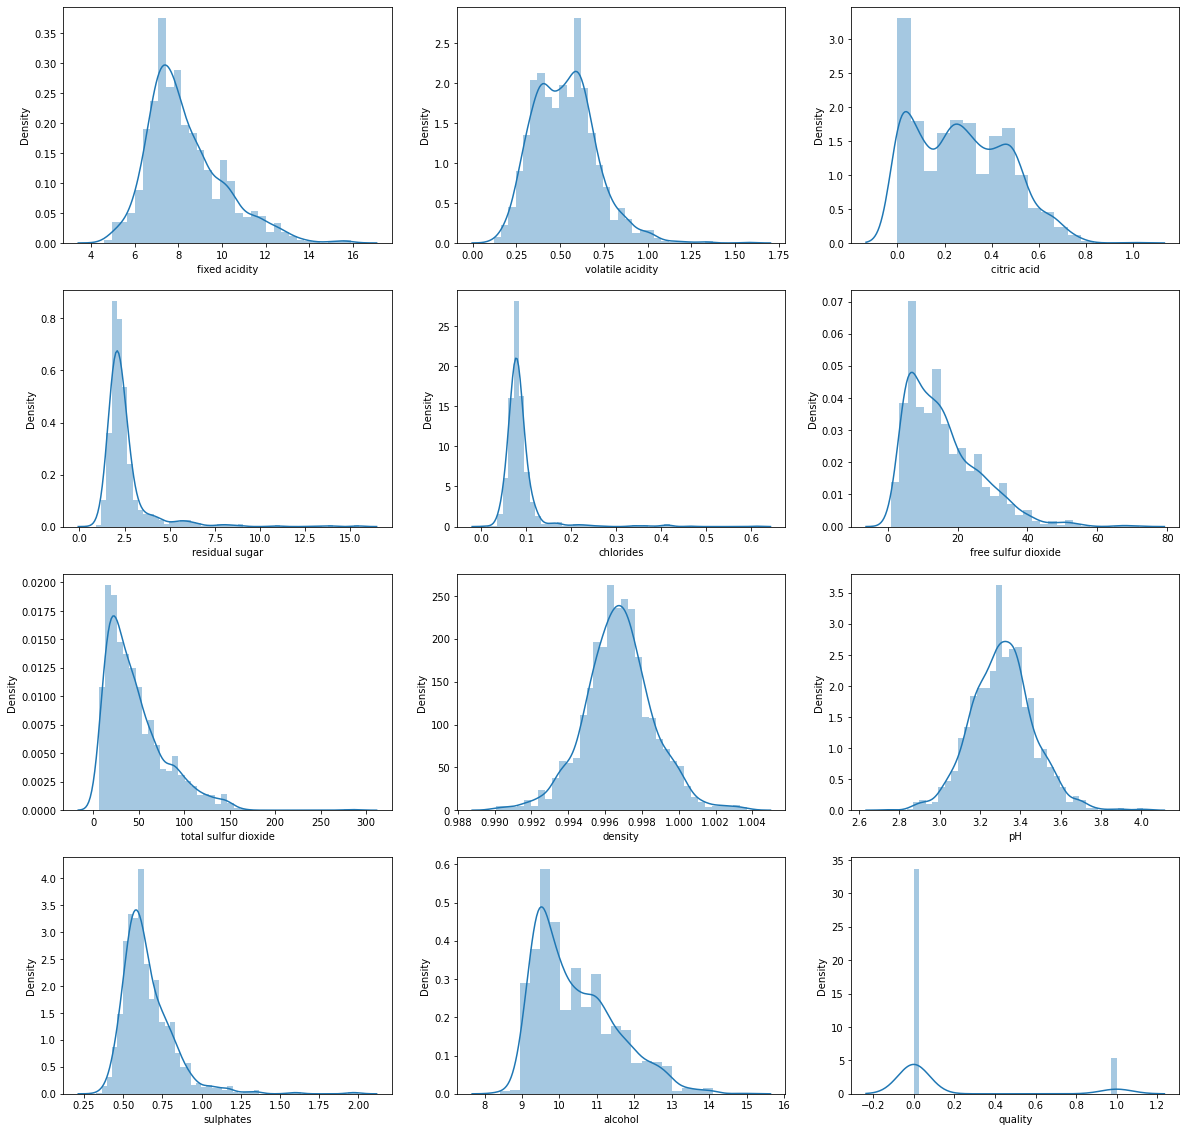

In [9]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

- We can see thre is skewness in several columns - all feature columns except maybe density

- We need to remove this skewness and we will do so using z-score

In [10]:
from scipy import stats

In [11]:
from scipy.stats import zscore
from scipy.stats import zscore
z_score = zscore(df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis=1)
df = df[filtering_entry]
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


- Again, check the skewness post treatment

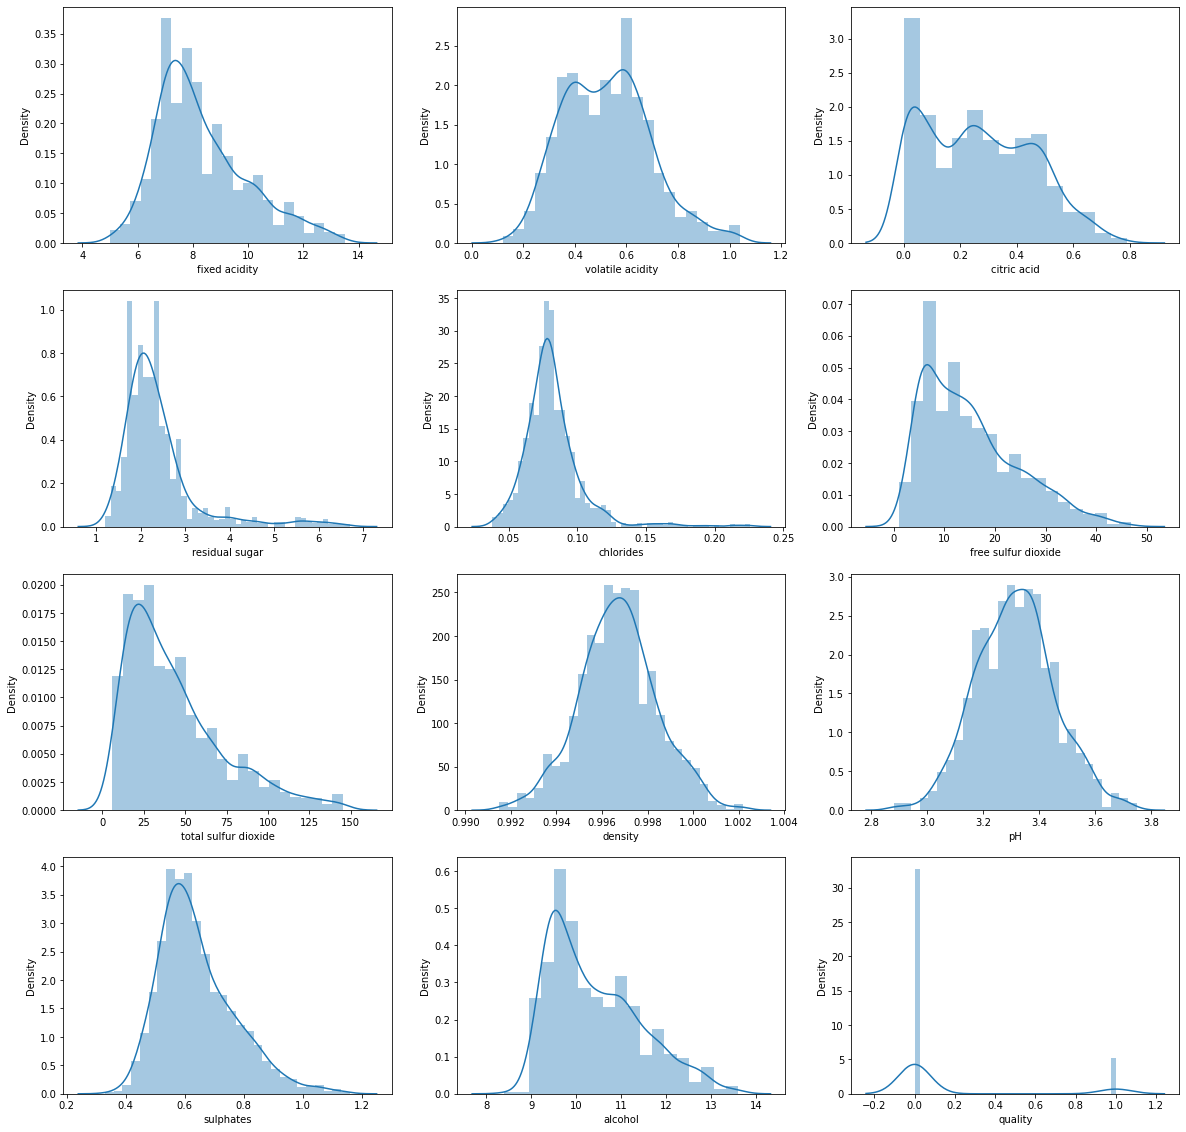

In [12]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

- We can confirm the skewness has decresed quite a lot for most columns

We should now check the Heatmap, to ensure there is no multi-collinearity problem occuring which may lead to overfitting our model

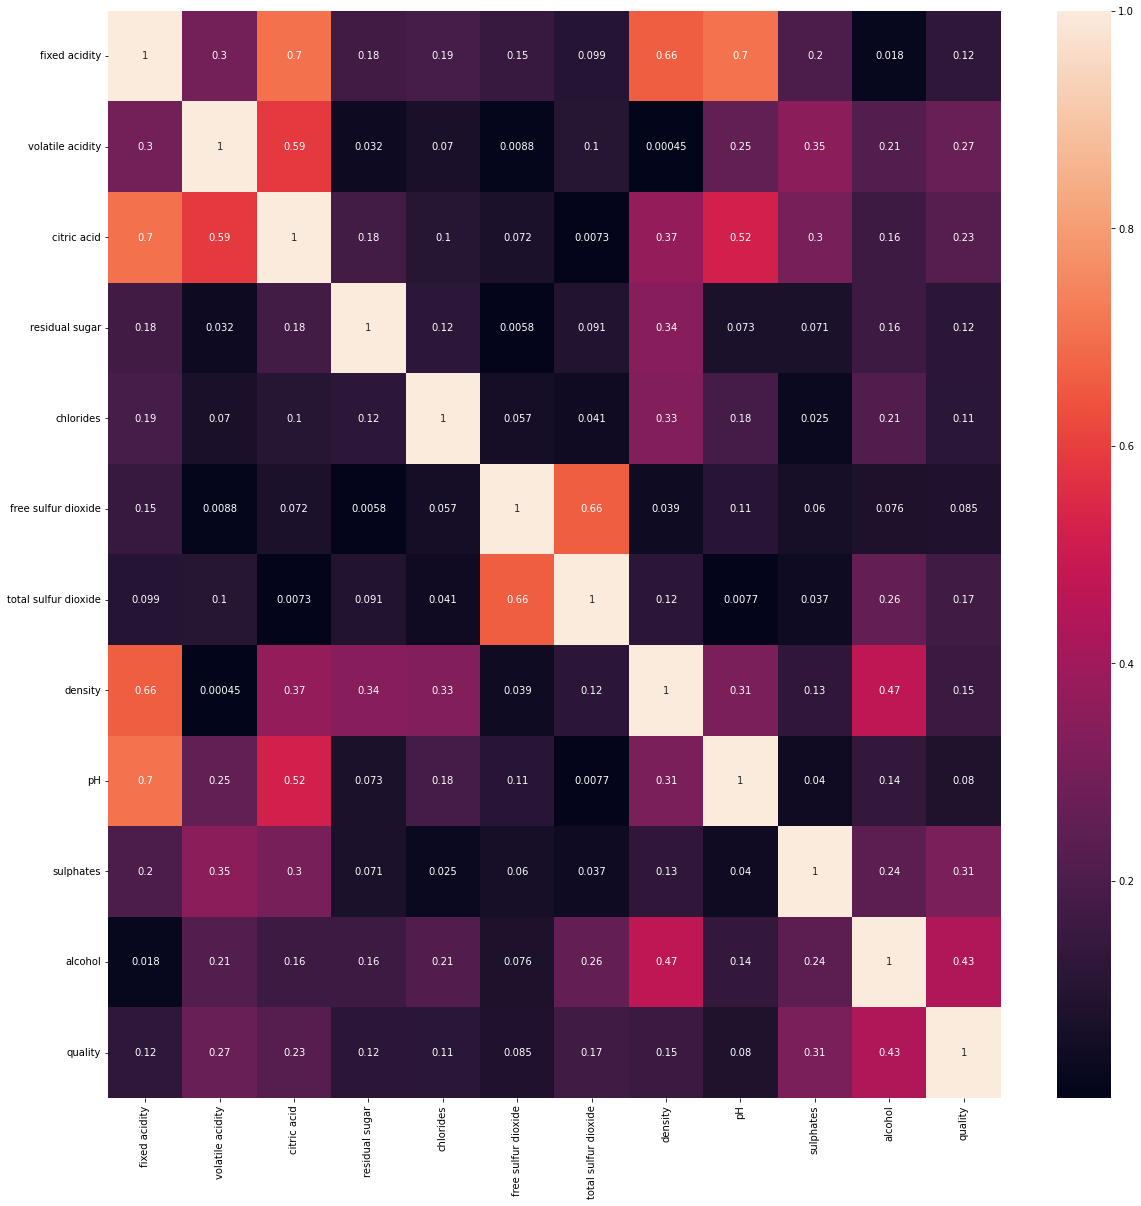

In [13]:
df_corr = df.corr().abs()

plt.figure(figsize=(20,20))
sns.heatmap(df_corr,annot = True)
plt.show()

It seems pH and citric acid are highly related to fixed acidity, but we need to conduct more analysis before deleting any column

<function matplotlib.pyplot.show(close=None, block=None)>

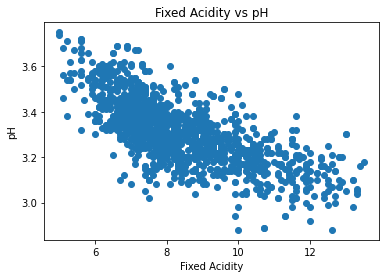

In [16]:
plt.scatter(df['fixed acidity'], df['pH'])
plt.xlabel('Fixed Acidity')
plt.ylabel('pH')
plt.title('Fixed Acidity vs pH')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

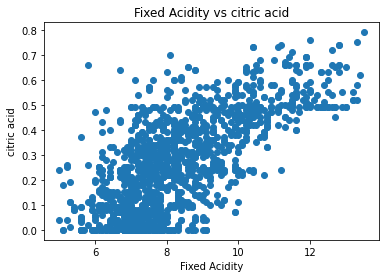

In [17]:
plt.scatter(df['fixed acidity'], df['citric acid'])
plt.xlabel('Fixed Acidity')
plt.ylabel('citric acid')
plt.title('Fixed Acidity vs citric acid')
plt.show

According to me, pH and Fixed Acidity do show high correlation and pH has minimal correlation with quality
Therefore, i will be deleting 'pH' column from dataset

Simultaneously, I will be seperating our target and feature variables

In [18]:
x = df.drop(columns = ['quality','pH'])
y = df['quality']

Now, checking the feature and target columns

In [19]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,0.71,10.2


In [20]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1458, dtype: int64

Now, for accurate predictions, we need to balance our target variable
 - Check balance using Counter

In [21]:
from collections import Counter
Counter(y)

Counter({0: 1257, 1: 201})

We can see our target variable is highly imbalanced and we need to balance it

In [22]:
from imblearn.over_sampling import SMOTE

In [24]:
x_train1,x_test,y_train1,y_test = train_test_split(x,y,test_size=0.25,random_state=69)

In [25]:
Counter(y_train1)

Counter({0: 942, 1: 151})

In [26]:
sm = SMOTE(sampling_strategy=0.8)

In [27]:
x_train,y_train = sm.fit_resample(x_train1,y_train1)

print('Classes before fit{} '.format(Counter(y_train1)))
print('Classes after fit{} '.format(Counter(y_train)))

Classes before fitCounter({0: 942, 1: 151}) 
Classes after fitCounter({0: 942, 1: 753}) 


Now that we have balanced our target variable, we can begin Model Training and Testing

In [28]:
lr = LogisticRegression()

In [29]:
lr.fit(x_train,y_train)

LogisticRegression()

In [30]:
def metric_score(clf,x_train,x_test,y_train,y_test,train = True):
    if train:
        y_pred = clf.predict(x_train)
        print('\n ======TRAINING RESULT======')
        print(f'Accuracy Score: {accuracy_score(y_train,y_pred)*100:.2f}%')
        
    elif train == False:
        pred = clf.predict(x_test)
        print('\n ======TESTING RESULT======')
        print(f'Accuracy Score: {accuracy_score(y_test,pred)*100:.2f}%')
        print('\n \n TEST CLASSIFICATION REPORT \n', classification_report(y_test,pred,digits =2))

In [31]:
metric_score(lr,x_train,x_test,y_train,y_test,train = True)
metric_score(lr,x_train,x_test,y_train,y_test,train = False)


 ======TRAINING RESULT======
Accuracy Score: 81.36%

 ======TESTING RESULT======
Accuracy Score: 83.56%

 
 TEST CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.95      0.85      0.90       315
           1       0.44      0.74      0.55        50

    accuracy                           0.84       365
   macro avg       0.70      0.80      0.73       365
weighted avg       0.88      0.84      0.85       365



We can note our Training Accuracy with Logistic Regression: 81.36% and Testing is: 83.56%
I can consider this a good score and as out training and testing data are very close, we can conclude the model is not overfitting

We should now test the data on other models as well to check which model is giving us the best result

In [32]:
from xgboost import XGBClassifier

In [33]:
knn = KNeighborsClassifier()
dec = DecisionTreeClassifier()
ran = RandomForestClassifier()
xgb = XGBClassifier()

In [34]:
#TRAINING THE MODELS
knn.fit(x_train,y_train)
dec.fit(x_train,y_train)
ran.fit(x_train,y_train)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

Check Testing Accuracies for other models:

In [35]:
print(lr.score(x_test,y_test))
print(knn.score(x_test,y_test))
print(dec.score(x_test,y_test))
print(ran.score(x_test,y_test))
print(xgb.score(x_test,y_test))

0.8356164383561644
0.7917808219178082
0.8849315068493151
0.9178082191780822
0.9260273972602739


Now that we have checked the accuracy for all models, we should plot the ROC-AUC curve to check the best fit model

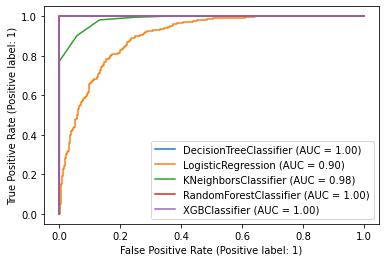

In [36]:
#CHECK ROC AUC CURVE FOR TRAINING

disp = plot_roc_curve(dec,x_train,y_train)
plot_roc_curve(lr,x_train,y_train,ax=disp.ax_)
plot_roc_curve(knn,x_train,y_train,ax=disp.ax_)
plot_roc_curve(ran,x_train,y_train,ax=disp.ax_)
plot_roc_curve(xgb,x_train,y_train,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

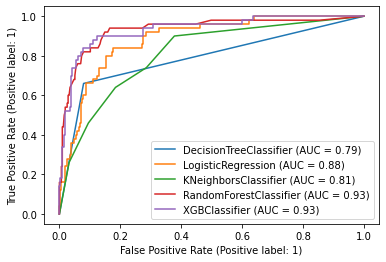

In [37]:
#ROC-AUC CURVE FOR TESTING
disp = plot_roc_curve(dec,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(ran,x_test,y_test,ax=disp.ax_)
plot_roc_curve(xgb,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

We can note below pointers from above graphs:
- Decision Tree, KNeighbors, Random Forest and XGB have perfect or near perfect learning rate on training data.
- Although great learning rate, the accuracy for Decision Tree, KNeghbors are very low in comparison: Model is Overfitting a lot
- Random Forest, XGB also have low comparitive testing accuracy: Model is somewhat overfitting
- Logistic Regression has poorer testing and training accuracy but no overfitting problem
- Logistic Regression will be my model of choice but XGB and Random Forest can also be considered if accuracy precedes the overfitting issue

INPIRATION COLUMN:
- Lokking at the heatmap, alcohol, sulphates, volatile acidity and citric acid are most correlated with quality thus making them the physiochemical properties making a wine 'Good'